<a href="https://colab.research.google.com/github/atlmapguy/netflix/blob/main/cosine_sim_netflix2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np

In [6]:
pwd

'/content'

In [7]:
movie = pd.read_csv("/content/netflix_titles.csv")
movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [8]:
print(movie.shape)
movie.head(10)

(6234, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


In [9]:
movie.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

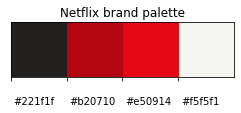

In [11]:
# Palette
colour = ['#221f1f', '#b20710', '#e50914','#f5f5f1']
sns.palplot(colour)
ax = plt.gca()

plt.title("Netflix brand palette")
for i, name in enumerate(colour):
    ax.text(i-0.45,1, name) 
plt.show()

<BarContainer object of 2 artists>

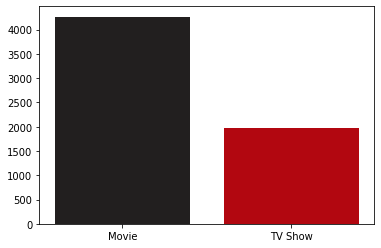

In [12]:
movie_type = movie.groupby('type').show_id.count()
plt.bar(x = movie_type.index, height=movie_type.values, color=colour)

Text(-2, -2, 'Which year has the most movies/TV shows be released?')

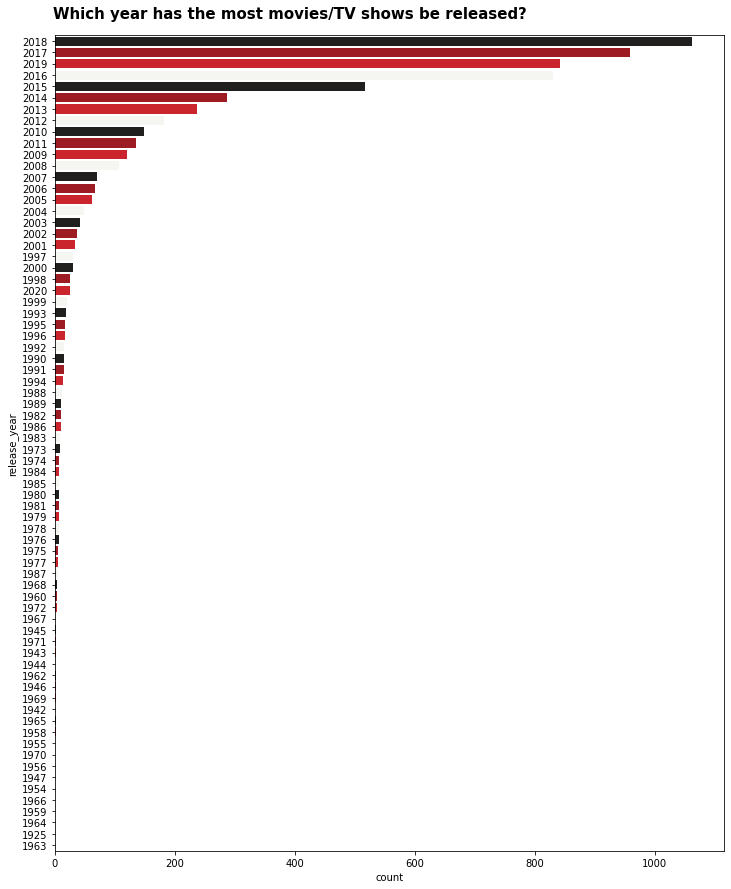

In [13]:
plt.figure(figsize=(12,15))
sns.countplot(y="release_year", data=movie, palette=colour, order=movie['release_year'].value_counts().index)
plt.text(-2,-2,"Which year has the most movies/TV shows be released?", family='sans-serif', fontsize=15, weight='bold')

In [14]:
movie['date_added'] = pd.to_datetime(movie['date_added'])
movie['date_added_year'] = movie['date_added'].dt.year
movie['date_added_month'] = movie['date_added'].dt.month

Text(-2, -2, 'Which month has the most movies/TV shows be added?')

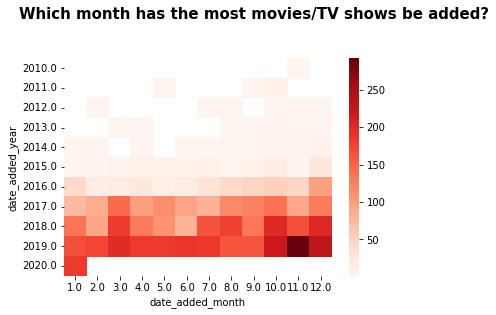

In [15]:
sns.heatmap(movie.loc[movie['date_added_year'].fillna(0).astype(int).between(2010,2020)].
            pivot_table(values='show_id',index='date_added_year',columns='date_added_month',aggfunc='count'),
           cmap='Reds')
plt.text(-2,-2,"Which month has the most movies/TV shows be added?", family='sans-serif', fontsize=15, weight='bold')

In [16]:
pip install plotly==4.14.3

     |████████████████████████████████| 13.2 MB 3.6 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=d958ddc1cd56c11fa97e084f01014e0336ed2a94e0a035b98d785850ac110d8d
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [17]:
import plotly.graph_objects as go

In [18]:
import plotly.express as px

In [19]:
country = movie.groupby('country').show_id.count().reset_index()
country = country.rename(columns={'show_id':'no of movies'})
fig = px.treemap(country, path=['country','no of movies'], values='no of movies',
                title='Distribution by country')
fig.show()

In [20]:
import itertools as it

In [21]:
pip install wordcloud

In [22]:
import nltk
from wordcloud import WordCloud

In [23]:
genre = movie['listed_in'].tolist()

In [24]:
cloud = WordCloud(background_color = 'white',colormap='Reds',max_words = 120).generate(''.join(list(it.chain(*genre))))

Text(-1, -10, 'Most frequent keywords in attribute')

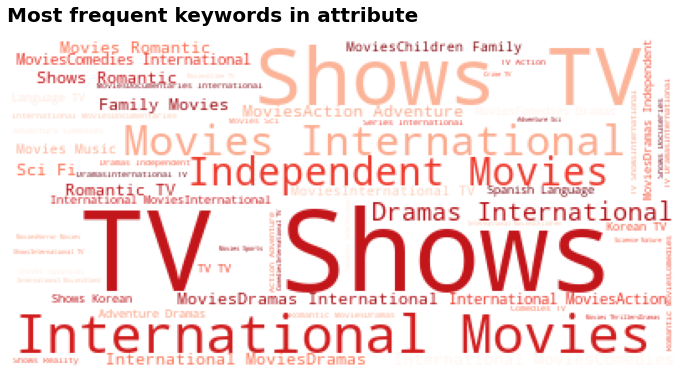

In [25]:
plt.figure(figsize=(12,12))
plt.imshow(cloud)
plt.axis('off')
plt.text(-1,-10,"Most frequent keywords in attribute", family='sans-serif', fontsize=20, weight='bold')

In [26]:
from PIL import Image

In [27]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
#Replace NaN with an empty string, since the converter cannot deal with integer/float
movie['description'] = movie['description'].fillna('')

In [29]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#get the tf-idf scores
#create TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(movie['description'])

#shape of tfidf_matrix
tfidf_matrix.shape

(6234, 16151)

In [30]:
pd.DataFrame(tfidf_matrix[0].T.todense(), index=tfidf.get_feature_names(), columns=["tf-idf score"])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,tf-idf score
000,0.0
007,0.0
009,0.0
10,0.0
100,0.0
...,...
ömer,0.0
über,0.0
łukasz,0.0
ōarai,0.0


In [31]:
#CountVectorizer: Convert a collection of text documents to a matrix of token counts
#TfidfTransformer: Transform a count matrix to a normalized tf or tf-idf representation

from sklearn.pipeline import Pipeline

pipe = Pipeline([('cv', CountVectorizer(stop_words='english')),
                ('tfid', TfidfTransformer())]).fit(movie['description'])

print("CountVectorizer_matrix: {}".format(pipe['cv'].transform(movie['description']).toarray()))
print("CountVectorizer_matrix: {}".format(pipe['tfid'].idf_))

CountVectorizer_matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
CountVectorizer_matrix: [6.47983732 8.63932157 9.04478668 ... 9.04478668 9.04478668 9.04478668]


In [32]:
pipe['tfid'].idf_.shape

(16151,)

In [33]:
#The lower the IDF value of a word, the less unique it is to any particular document
pd.DataFrame(pipe['tfid'].idf_, index=pipe['cv'].get_feature_names(), columns=['idf_weights'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,idf_weights
000,6.479837
007,8.639322
009,9.044787
10,6.211573
100,7.253027
...,...
ömer,9.044787
über,8.639322
łukasz,9.044787
ōarai,9.044787


In [34]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix)

In [35]:
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [36]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim1 = linear_kernel(tfidf_matrix, tfidf_matrix)

In [37]:
cosine_sim1

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [38]:
programme_list=movie['title'].to_list()

In [39]:
def recommend(title, cosine_similarity=cosine_sim):
    index = programme_list.index(title)
    sim_score = list(enumerate(cosine_sim[index]))
    sim_score = sorted(sim_score, key= lambda x: x[1], reverse=True)[1:11] #position 0 is the movie itself, thus exclude
    recommend_index = [i[0] for i in sim_score]
    rec_movie = movie['title'].iloc[recommend_index]
    rec_score = [round(i[1],4) for i in sim_score]
    rec_table = pd.DataFrame(list(zip(rec_movie,rec_score)), columns=['Recommend programme','Similarity(0-1)'])
    return rec_table

In [40]:
recommend('Avengers: Infinity War')

,Recommend programme,Similarity(0-1)
0,The Talented Mr. Ripley,0.1627
1,LEGO Marvel Super Heroes: Black Panther,0.1231
2,Aliens Ate My Homework,0.1214
3,Chilling Adventures of Sabrina,0.1202
4,Vroomiz,0.1140
5,Orbiter 9,0.1089
6,LEGO Marvel Super Heroes: Guardians of the Galaxy,0.1012
7,Minecraft: Story Mode,0.1010
8,Balto,0.0978
9,Race 2,0.0934


In [41]:
recommend('Why Are We Getting So Fat?')

,Recommend programme,Similarity(0-1)
0,Forks Over Knives,0.1728
1,The Company Men,0.1391
2,Freeway: Crack in the System,0.1201
3,Marvel & ESPN Films Present: 1 of 1: Genesis,0.1030
4,Adam Ruins Everything,0.1006
5,Here Alone,0.0986
6,Misfit,0.0983
7,MINDHUNTER,0.0982
8,At All Costs,0.0980
9,The Great Hack,0.0964


In [42]:
recommend('About Time')

,Recommend programme,Similarity(0-1)
0,How to Be a Player,0.2333
1,Tomorrow with You,0.2007
2,The Legend of Michael Mishra,0.1926
3,Jupiter Ascending,0.1757
4,Running Out Of Time,0.1579
5,One by Two,0.1550
6,Justin Time,0.1526
7,Like Arrows,0.1512
8,Revolutionary Road,0.1512
9,Tim Allen: Men Are Pigs,0.1475


In [43]:
recommend('忍者ハットリくん')

,Recommend programme,Similarity(0-1)
0,Ninja Hattori,0.5607
1,Reboot: The Guardian Code,0.1746
2,Let's Eat 2,0.1399
3,Reply 1994,0.1231
4,Deadly Switch,0.1163
5,My Husband Won't Fit,0.1031
6,Christmas in the Smokies,0.0986
7,Planet Earth: The Complete Collection,0.0863
8,Ouran High School Host Club,0.0845
9,Accidentally in Love,0.0833


In [44]:
recommend("Indiana Jones and the Last Crusade")

,Recommend programme,Similarity(0-1)
0,Fate/Apocrypha,0.2248
1,Indiana Jones and the Temple of Doom,0.1908
2,Fate/EXTRA Last Encore,0.1870
3,Indiana Jones and the Raiders of the Lost Ark,0.1848
4,Fate/Zero,0.1834
5,Fate/stay night: Unlimited Blade Works,0.1784
6,Monty Python and the Holy Grail,0.1672
7,Indiana Jones and the Kingdom of the Crystal S...,0.1670
8,Dragons: Dawn of the Dragon Racers,0.1225
9,Off Camera,0.1154


In [45]:
movie.loc[movie['director']=='Steven Spielberg']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,date_added_month
1183,70121502,Movie,The Adventures of Tintin,Steven Spielberg,"Jamie Bell, Andy Serkis, Daniel Craig, Nick Fr...","United States, New Zealand, United Kingdom",2019-11-20,2011,PG,107 min,Children & Family Movies,This 3-D motion capture adapts Georges Remi's ...,2019.0,11.0
1579,70172928,Movie,War Horse,Steven Spielberg,"Emily Watson, David Thewlis, Peter Mullan, Nie...","United States, India",2019-05-06,2011,PG-13,147 min,Dramas,"During World War I, the bond between a young E...",2019.0,5.0
3490,60024942,Movie,Catch Me If You Can,Steven Spielberg,"Leonardo DiCaprio, Tom Hanks, Christopher Walk...","United States, Canada",2020-01-01,2002,PG-13,142 min,Dramas,An FBI agent makes it his mission to put cunni...,2020.0,1.0
3613,70084799,Movie,Indiana Jones and the Kingdom of the Crystal S...,Steven Spielberg,"Harrison Ford, Cate Blanchett, Karen Allen, Ra...",United States,2019-01-01,2008,PG-13,123 min,"Action & Adventure, Children & Family Movies, ...",Indiana Jones is drawn into a Russian plot to ...,2019.0,1.0
3614,60010487,Movie,Indiana Jones and the Last Crusade,Steven Spielberg,"Harrison Ford, Sean Connery, Denholm Elliott, ...",United States,2019-01-01,1989,PG-13,127 min,"Action & Adventure, Children & Family Movies, ...","Accompanied by his father, Indiana Jones sets ...",2019.0,1.0
3615,60011649,Movie,Indiana Jones and the Raiders of the Lost Ark,Steven Spielberg,"Harrison Ford, Karen Allen, Paul Freeman, Rona...",United States,2019-01-01,1981,PG,116 min,"Action & Adventure, Children & Family Movies, ...",When Indiana Jones is hired by the government ...,2019.0,1.0
3616,60010488,Movie,Indiana Jones and the Temple of Doom,Steven Spielberg,"Harrison Ford, Kate Capshaw, Amrish Puri, Rosh...",United States,2019-01-01,1984,PG,119 min,"Action & Adventure, Children & Family Movies, ...","Indiana Jones, his young sidekick and a spoile...",2019.0,1.0
3877,70251896,Movie,Lincoln,Steven Spielberg,"Daniel Day-Lewis, Sally Field, David Strathair...","United States, India",2018-02-21,2012,PG-13,150 min,Dramas,Director Steven Spielberg takes on the towerin...,2018.0,2.0
5541,60036359,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,2018-04-01,1993,R,195 min,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...,2018.0,4.0


In [46]:
#select programme type,country,genres,director & description
#join all the info together
#convert all words into lowercase so that algorithm will not distinguish as independent words
def bag_of_words(df):
    features = df['type']+' '+df['country']+' '+df['listed_in']+' '+df['director']+' '+df['description']
    return features.fillna('').str.lower()

In [47]:
features = bag_of_words(movie)

In [48]:
features.head(10)

0    movie united states, india, south korea, china...
1                                                     
2                                                     
3                                                     
4    movie united states comedies fernando lebrija ...
5                                                     
6    movie bulgaria, united states, spain, canada i...
7    movie chile stand-up comedy rodrigo toro, fran...
8                                                     
9    movie united states, united kingdom, denmark, ...
dtype: object

In [49]:
tfidf_matrix2 = tfidf.fit_transform(features)                
tfidf_matrix2.shape

(6234, 16760)

In [50]:
cosine_sim2 = cosine_similarity(tfidf_matrix2)

In [51]:
def recommend2(title, cosine_similarity=cosine_sim2):
    index = programme_list.index(title)
    sim_score = list(enumerate(cosine_sim2[index]))
    sim_score = sorted(sim_score, key= lambda x: x[1], reverse=True)[1:11] #position 0 is the movie itself, thus exclude
    recommend_index = [i[0] for i in sim_score]
    rec_movie = movie['title'].iloc[recommend_index]
    rec_score = [round(i[1],4) for i in sim_score]
    rec_table = pd.DataFrame(list(zip(rec_movie,rec_score)), columns=['Recommend programme','Similarity(0-1)'])
    return rec_table

In [52]:
recommend2("Indiana Jones and the Last Crusade")

,Recommend programme,Similarity(0-1)
0,Indiana Jones and the Temple of Doom,0.3806
1,Indiana Jones and the Raiders of the Lost Ark,0.3656
2,Indiana Jones and the Kingdom of the Crystal S...,0.2974
3,Monty Python and the Holy Grail,0.2426
4,Lincoln,0.2101
5,The Adventures of Tintin,0.1674
6,Schindler's List,0.1539
7,Jagga Jasoos,0.1464
8,The Do-Over,0.1417
9,Rim of the World,0.1347
